Files imported successfully
X_train: (1378, 100, 100, 3)
X_test: (69, 100, 100, 3)
X_val: (276, 100, 100, 3)
y_train: (1378,)
y_test: (69,)
y_val: (276,)
X_train: (1378, 30000)
X_test: (69, 30000)
X_val: (276, 30000)
y_train: (1378,)
y_test: (69,)
y_val: (276,)
Using SKLEARN


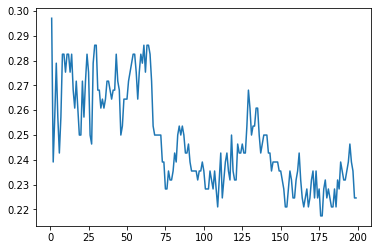

max acc at k=1 acc of %29.71014492753623


In [4]:
#https://medium.com/swlh/image-classification-with-k-nearest-neighbours-51b3a289280
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)
def load_image_files(container_path, dimension=(150, 150)):
    #my code modified from original
    datasets = Path(container_path)
    image_dir = [dataset for dataset in datasets.iterdir() if dataset.is_dir()]
    cheetahFolder = []
    foxFolder = []
    hyenaFolder = []
    lionFolder = []
    tigerFolder = []
    wolfFolder = []
    for each in image_dir:
        for that in Path(each.as_posix()).iterdir():
            if that.name == 'cheetah':
                cheetahFolder.append(that)
            elif that.name == 'fox':
                foxFolder.append(that)
            elif that.name == 'hyena':
                hyenaFolder.append(that)
            elif that.name == 'lion':
                lionFolder.append(that)
            elif that.name == 'tiger':
                tigerFolder.append(that)
            elif that.name == 'wolf':
                wolfFolder.append(that)
    folders = cheetahFolder + foxFolder + hyenaFolder + lionFolder + tigerFolder + wolfFolder
    categories = [fo.name for fo in folders]
    categories = list(set(categories)) #gets unique values
    #my code modified from original
    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #changed code to convert bgr to rgb
            img_pred = cv.resize(img, dimension, interpolation=cv.INTER_AREA) #changed image size and replaced it with the parameters above
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

X = []
X = load_image_files("/kaggle/input/seperateddataset/AnimalClassifyData/")

#Edited by me
y0 = np.zeros(342)
#number of cheetas in X
y1 = np.ones(250)
#number of foxes in X
y2 = np.full(305, 2)
#number of hyenas in X
y3 = np.full(294, 3)
#number of lions in X
y4 = np.full(269, 4)
#number of tigers in X
y5 = np.full(263, 5)
#number of wolves in X
#Edited by me
y = []
y = np.concatenate((y0,y1,y2,y3,y4,y5), axis=0) #added in the extra classes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=.2)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 200): #increased testing range to 200 to possibly find different Ks
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of %"+str(acc*100))